# Obtain Datasets


<div style:"align=justify"> 
The first step is to obtain unstructure data that contains images of X-ray Chest uses Kaggle API.
</div>

In [1]:
!pip install kaggle --upgrade   # install and upgrade kaggle
!pip install tensorflow==2.4.0  # install 2.4.0 version of Tensorflow

     |████████████████████████████████| 61kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 17.3MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Stored in directory: /home/dsxuser/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f79a5b7b6aea925a15dd1e5c4992a4
Successfully built kaggle python-slugify
     |████████████████████████████████| 394.7MB 100kB/s  eta 0:00:01     |████████▎                       | 102.6MB 38.2MB/s eta 0:00:08     |█████████████▍                  | 165.2MB 42.7MB/s eta 0:00:06     |██████████████████              | 222.2MB 29.8MB/s eta 0:00:06MB/s eta 0:00:06     |██████████████████████████▌     | 326.6MB 14.7MB/s eta 0:00:05�██▉| 392.0MB 40.3MB/s eta 0:00:01
     |████████████████████████████████| 133kB 37.5MB/s eta 0:00:01
     |████████████████████████████████| 10.6MB 34.4MB/s eta 0:00:0100:01
     |████████████████████████████████| 51kB 20.1MB/s eta 0:00:01


In [3]:
!echo '{"username":"jonahwinninghoff","key":"9f781c2f96e9b19527914536119f7f76"}' > ~/.kaggle/kaggle.json
!chmod 600 /home/dsxuser/.kaggle/kaggle.json

In [4]:
import kaggle

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
api.dataset_download_files('pranavraikokte/covid19-image-dataset', 
                           path='./',
                           force=True, 
                           quiet=False)

  3%|▎         | 5.00M/158M [00:00<00:03, 42.2MB/s]

100%|██████████| 158M/158M [00:03<00:00, 49.5MB/s] 

In [7]:
from zipfile import ZipFile          # Download and unzip images from kaggle API

zipped = 'covid19-image-dataset.zip'
datasets = 'datasets'

zf = ZipFile(zipped)
zf.extractall(datasets)
zf.close()

In [8]:
import os                            # Create a filesystem directory of images

images = []
for dirname, _, filenames in os.walk(datasets):
    for filename in filenames:
        images.append(os.path.join(dirname, filename))

# Undertake Exploratory Data Analysis

In [9]:
words = ["The entire dataset has", str(len(images)), "different images."]

print(" ".join(words))

The entire dataset has 317 different images.


In [10]:
train = []                      # Separate training dataset from testing 
test = []
for i in range(len(images)):
    if "train" in images[i]:
        train.append(os.path.join(os.getcwd(),images[i]))
    else:
        test.append(os.path.join(os.getcwd(),images[i]))

    
        
a = str(len(train))             # Write the statement
b = str(len(test))
c = str(round(100*len(test)/(len(train)+len(test)),2))
        
words = ["Training dataset has",a, 
         "images while testing dataset has", 
         b, "images. That is, the testing dataset is", 
         c, "percent of the entire dataset."]

print(" ".join(words))

Training dataset has 251 images while testing dataset has 66 images. That is, the testing dataset is 20.82 percent of the entire dataset.


In [101]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow
import pathlib
import datetime
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

%matplotlib inline

In [12]:
train_path = '/home/dsxuser/work/datasets/Covid19-dataset/train' # Construct pathlib necessary for Tensorflow
test_path = '/home/dsxuser/work/datasets/Covid19-dataset/test'

training = pathlib.Path(train_path)
testing = pathlib.Path(test_path)

In [13]:
batch_size = 10   # Read 10 images per
img_height = 200  # Size of every image
img_width = 200

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory( # Training dataset
  training,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory( # Testing dataset
  testing,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


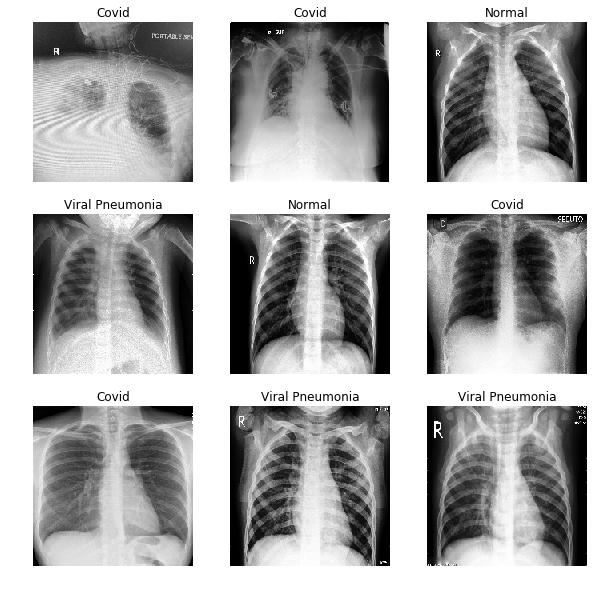

In [36]:
plt.figure(figsize=(10, 10))                          # Randomly select nine different images with label
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

The next task is to find each number of images for each type of lungh, average image, contrast between three images, image standard deviation, and eigenimages

In [37]:
training_normal_path = '/home/dsxuser/work/datasets/Covid19-dataset/train/Normal' # Normal lung file path
training_pneumonia_path = '/home/dsxuser/work/datasets/Covid19-dataset/train/Viral Pneumonia' # Virual Pneumonia file path
training_COVID_path = '/home/dsxuser/work/datasets/Covid19-dataset/train/Covid'   # COVID lung file path 


training_normal = pathlib.Path(training_normal_path)
training_pneumonia = pathlib.Path(training_pneumonia_path)
training_COVID = pathlib.Path(training_COVID_path)

In [38]:
N = len(list(training.glob('Normal/*')))          # Count total images for each type in training dataset
C = len(list(training.glob('Covid/*')))
P = len(list(training.glob('Viral Pneumonia/*')))

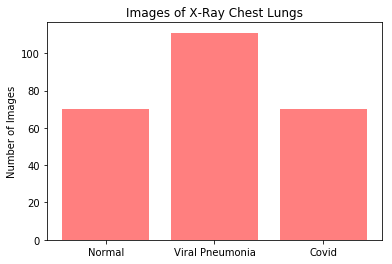

In [39]:
objects = ('Normal', 'Viral Pneumonia', 'Covid')  # Make a bar chart for this
y_pos = np.arange(len(objects))
performance = [N,C,P]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='red')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Images of X-Ray Chest Lungs')

plt.show()

In [40]:
Normal = list(training.glob('Normal/*'))            # Create subsets of training dataset
Covid = list(training.glob('Covid/*'))
Pneumonia = list(training.glob('Viral Pneumonia/*'))

In [41]:
def matrix_image(path, number_of_list, size = (64, 64)):            # Create full matrix transformation function based on image pixels
    # iterating through each file
    for i in range(number_of_list):
        current_image = image.load_img(path[i], target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

In [42]:
normal = matrix_image(Normal,len(Normal))     # Transform all normal lung images into full matrix
pneum = matrix_image(Pneumonia,len(Pneumonia)) # Pneumonia
covid = matrix_image(Covid,len(Covid))         # Covid

In [43]:
def average_img(full_mat, size = (64, 64)): # Create the average image function
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img

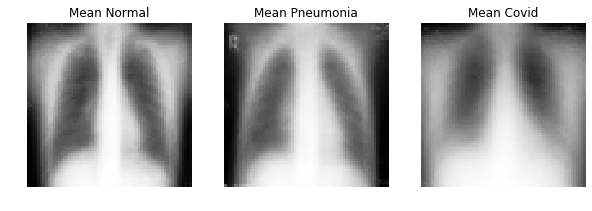

In [44]:
norm_mean = average_img(normal)
pneu_mean = average_img(pneum)
covi_mean = average_img(covid)

thelist = [norm_mean, pneu_mean, covi_mean]
label = ["Mean Normal", "Mean Pneumonia","Mean Covid"]

plt.figure(figsize=(10, 10))                          # Average image of each type
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(thelist[i],cmap='Greys_r')
        plt.title(label[i])
        plt.axis("off")

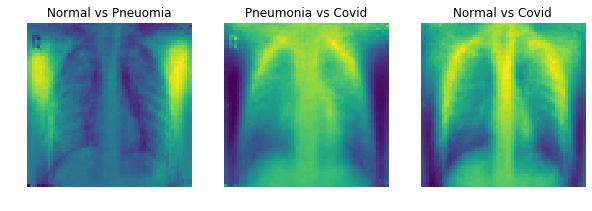

In [45]:
contrast_norm_pneu = norm_mean - pneu_mean             # Calculate difference between two types of lungs
contrast_pneu_covi = pneu_mean - covi_mean
contrast_norm_covi = norm_mean - covi_mean

thelist = [contrast_norm_pneu,contrast_pneu_covi,contrast_norm_covi]
label = ["Normal vs Pneuomia", "Pneumonia vs Covid","Normal vs Covid"]

plt.figure(figsize=(10, 10))                          # Contrast between two types
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(thelist[i])
        plt.title(label[i])
        plt.axis("off")

In [46]:
def sd_img(full_mat, size = (64, 64)): # Create the standard deviation image function
    # calculate the stdev
    sd_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    sd_img = sd_img.reshape(size)
    return sd_img

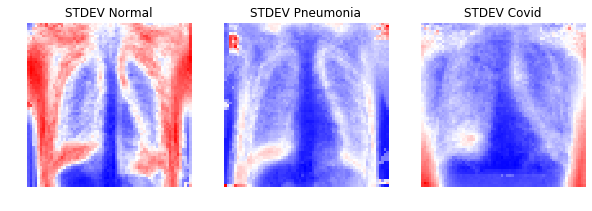

In [47]:
norm_sd = sd_img(normal)
pneu_sd = sd_img(pneum)
covi_sd = sd_img(covid)

thelist = [norm_sd, pneu_sd, covi_sd]
label = ["STDEV Normal", "STDEV Pneumonia","STDEV Covid"]

plt.figure(figsize=(10, 10))                          # Standard deviation image of each type
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(thelist[i],cmap='bwr')
        plt.title(label[i])
        plt.axis("off")

# Increase data noise
Enable the Deep Learning more resistent to out-of-sample errors.

In [48]:
data_noise = keras.Sequential([                                        # Automate to modify shape of every image
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape=(img_height,
                                                            img_width,
                                                            3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)])

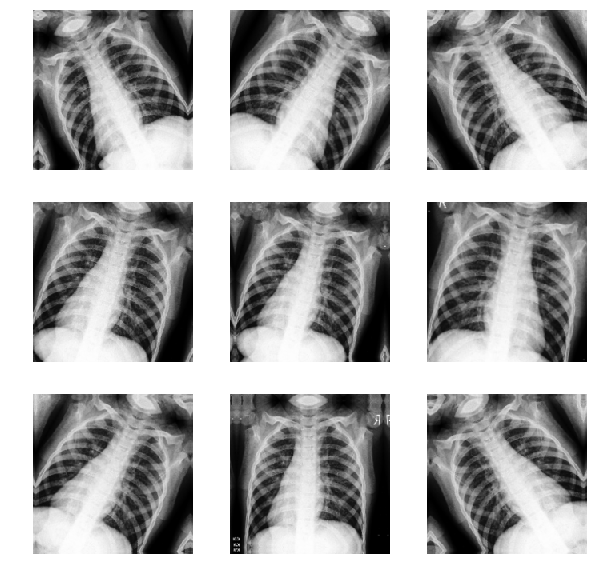

In [49]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    noise_images = data_noise(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(noise_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Use Convolutional Neural Network to train image classification

In [50]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) # Standardize the data

In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

words = ["The range of pixel values is from", str(np.min(first_image)),"to",str(np.max(first_image)),"instead between 0 and 255."]

print(" ".join(words))

The range of pixel values is from 0.0 to 1.0 instead between 0 and 255.


In [52]:
AUTOTUNE = tensorflow.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE) # Increase speed of data processing

In [53]:
num_classes = 3

model = Sequential([                                       # Build deep neural network using Keras API
  data_noise,                                              # Make data more noise
  layers.experimental.preprocessing.Rescaling(1./255),     # Standardize image
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)       

In [57]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=1000,
    decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=opt,                            # Write the model compilation
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Need to optimize learning rate for image classification

In [98]:
def optimal_learning_rate(train,epoch,decay_step,decay_rat,number,start,stop):  # Create the function for identifying optimal learning rate
    theloss = []
    for lr in np.linspace(start=start, stop=stop, num=number):     # Loop from learning rate range you choose
        lr_schedule = keras.optimizers.schedules.ExponentialDecay( # This is Exponential Decay Learning Rate
        initial_learning_rate=lr,
        decay_steps=decay_step,
        decay_rate=decay_rat)
        opt = keras.optimizers.SGD(learning_rate=lr_schedule)
    
        model.compile(optimizer=opt,                                # Same Deep Learning function I built         
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
        result = model.fit(                                         # Train DL two times each loop
            train,
            batch_size=batch_size,
            epochs=epoch)
        
        average = np.mean(result.history['loss'])                   # Find min loss, max loss, and mean loss
        mini = np.min(result.history['loss'])
        maxi = np.max(result.history['loss'])
        
        row = [average,mini,maxi,lr]                                # Fill vectors in empty list
        theloss.append(row)
        
    return pd.DataFrame(theloss, columns = ['Mean Loss','Min Loss','Max Loss','Learning Rate']) # Convert them into panda dataframe


In [99]:
train = train_ds                  # Apply the optimal learning rate function
epoch = 2
decay_step = 1000
decay_rat = 0.9
number = 50
start = 0.0001
stop = 0.02

theresult = optimal_learning_rate(train,epoch,decay_step,decay_rat,number,start,stop)
  
print(theresult)

Epoch 1/2
26/26 [==============================] - 20s 726ms/step - loss: 1.0576 - accuracy: 0.4688
Epoch 2/2
26/26 [==============================] - 18s 708ms/step - loss: 1.0574 - accuracy: 0.4676
Epoch 1/2
26/26 [==============================] - 19s 675ms/step - loss: 1.0540 - accuracy: 0.4767
Epoch 2/2
26/26 [==============================] - 17s 672ms/step - loss: 1.0778 - accuracy: 0.4166
Epoch 1/2
26/26 [==============================] - 19s 694ms/step - loss: 1.0719 - accuracy: 0.4357
Epoch 2/2
26/26 [==============================] - 17s 665ms/step - loss: 1.0600 - accuracy: 0.4629
Epoch 1/2
26/26 [==============================] - 19s 683ms/step - loss: 1.0521 - accuracy: 0.4805
Epoch 2/2
26/26 [==============================] - 18s 709ms/step - loss: 1.0535 - accuracy: 0.4742
Epoch 1/2
26/26 [==============================] - 19s 708ms/step - loss: 1.0651 - accuracy: 0.4455
Epoch 2/2
26/26 [==============================] - 18s 691ms/step - loss: 1.0642 - accuracy: 0.4388


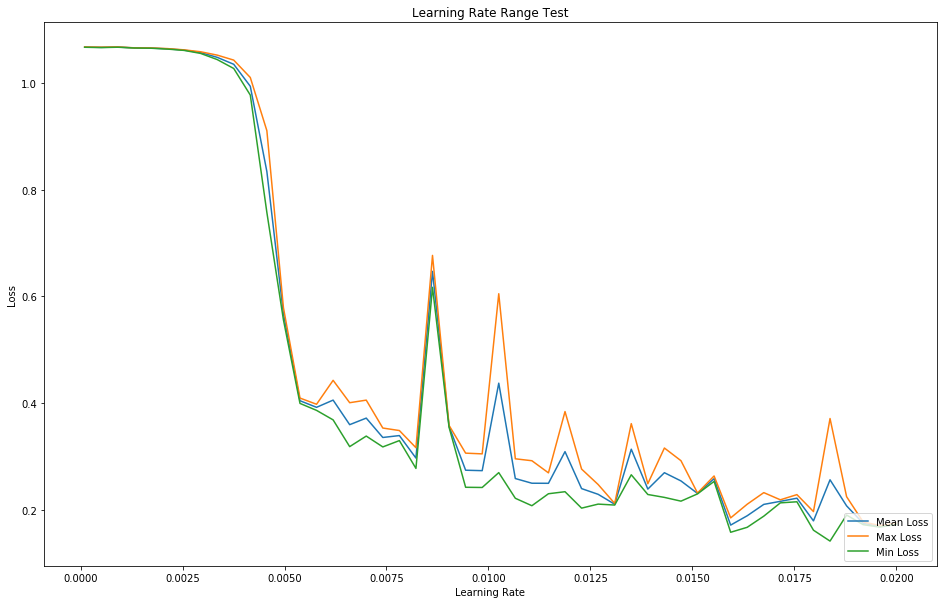

In [100]:
panda = theresult                                # Create multiple lines plot in relationship of loss and learning rate

plt.figure(figsize=(16, 10))
plt.plot('Learning Rate', 'Mean Loss',data=panda)
plt.plot('Learning Rate', 'Max Loss',data=panda)
plt.plot('Learning Rate', 'Min Loss',data=panda)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Learning Rate Range Test')
plt.show()

In [102]:
LR=list(panda.sort_values(by=['Mean Loss'])['Learning Rate'].head(1))[0]

# Start training Convolutional Neural Network!

In [103]:
epochs = 20                                       # Choose the value of learning rate and number of epochs

lr_schedule = keras.optimizers.schedules.ExponentialDecay( # This is Exponential Decay Learning Rate
        initial_learning_rate=LR,
        decay_steps=decay_step,
        decay_rate=decay_rat)

opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=opt,                                # Same Deep Learning function I built         
        loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

result = model.fit(
  train_ds,
  validation_data=test_ds,
  batch_size=batch_size,
  epochs=epochs)

Epoch 1/20
26/26 [==============================] - 20s 747ms/step - loss: 0.2378 - accuracy: 0.9139 - val_loss: 0.6625 - val_accuracy: 0.8788
Epoch 2/20
26/26 [==============================] - 19s 746ms/step - loss: 0.1913 - accuracy: 0.9126 - val_loss: 0.7826 - val_accuracy: 0.8636
Epoch 3/20
26/26 [==============================] - 20s 750ms/step - loss: 0.1866 - accuracy: 0.9143 - val_loss: 0.7284 - val_accuracy: 0.8788
Epoch 4/20
26/26 [==============================] - 20s 778ms/step - loss: 0.1442 - accuracy: 0.9389 - val_loss: 1.0567 - val_accuracy: 0.7273
Epoch 5/20
26/26 [==============================] - 20s 764ms/step - loss: 0.1838 - accuracy: 0.9278 - val_loss: 0.7299 - val_accuracy: 0.8939
Epoch 6/20
26/26 [==============================] - 19s 751ms/step - loss: 0.1691 - accuracy: 0.9522 - val_loss: 0.6598 - val_accuracy: 0.9091
Epoch 7/20
26/26 [==============================] - 19s 751ms/step - loss: 0.1383 - accuracy: 0.9367 - val_loss: 0.8116 - val_accuracy: 0.8182

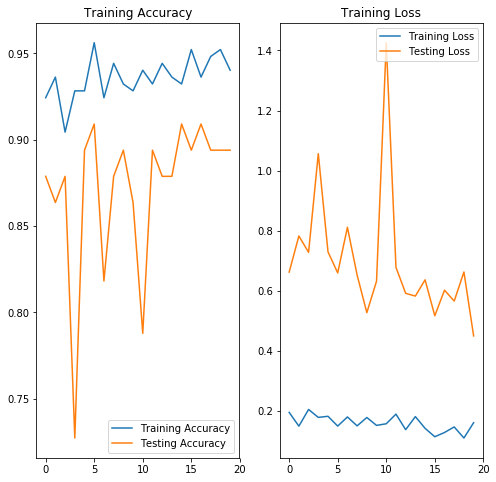

In [104]:
acc = result.history['accuracy']
tes_acc = result.history['val_accuracy']
loss = result.history['loss']
tes_loss = result.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, tes_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, tes_loss,label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [108]:
score = model.evaluate(test_ds, verbose=0)    # Undertake cross-validation evaluation

statement = ["As indicated by cross validation, the image classification performs well. Even though its accuracy is", 
             str(round(score[1]*100,2)),"percent, its loss is", 
             str(round(score[0],2)),"that is good."]

print(" ".join(statement))

As indicated by cross validation, the image classification performs well. Even though its accuracy is 89.39 percent, its loss is 0.45 that is good.


In [126]:
tensorflow.keras.models.save_model(model,"/".join([os.getcwd(),'X_ray_classify.h5']))